## Building dependencies

In [29]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

In [30]:
! pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [31]:
import tensorflow as tf

In [32]:
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [33]:
# set put gpu growth

gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [34]:
for gpu in gpus:
  print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [35]:
# building in tensorflow-dataset for fashion mnist
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [36]:
# load the fashion_mnist datasets
ds = tfds.load('fashion_mnist', split='train')

In [37]:
ds.as_numpy_iterator().next() # return a dict with keys: 'image' and 'label'

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

## Data visualization and pipeline

In [38]:
# for transformation
import numpy as np

In [39]:
dataIterator = ds.as_numpy_iterator()

In [40]:
# Getting data out of the pipeline
dataIterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [41]:
# the size of an image
dataIterator.next()['image'].shape

(28, 28, 1)

In [42]:
# squeeze any dimension of length 1
np.squeeze(dataIterator.next()['image'])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   0,   0,  36, 113, 143, 146, 150, 146, 143, 140,
        145, 149, 145, 141, 142, 166, 155, 139, 129,   6,   0,   0,   0,
          0,   0],
       [  1,   0,   0,  40, 167, 193, 191, 184, 185, 183, 183, 184, 185,
        184, 185, 181, 175, 174, 171, 163, 163, 178, 213,  71,   0,   0,
          1,   0],
       [  3,   0,  91, 211, 181, 169, 163, 159, 166, 172, 169, 168, 168,
        167, 169, 166, 161, 159, 165, 155, 162, 157, 166, 184, 170,  22,
          0,   2],
       [  1,   0,  81, 183, 155, 161, 159, 161, 162, 152, 155, 155, 155,
        151, 153, 152, 148, 150, 157, 142, 147, 145, 148, 144, 185,  25,
          0,   1],
       [  0,   0,  37, 181, 145, 153, 157, 143, 144, 152, 151, 152, 152,
        157, 159, 150, 151, 158, 150, 153, 147, 151, 150, 149, 179,  26,
          0,   2],
       [  0, 104, 181, 178, 159, 160, 154, 149, 152, 152, 152, 154, 154,
        158, 151, 154, 155, 152, 157, 150, 148, 160, 158, 136, 170,  97,
          0,   0],
       [ 53, 171, 201, 161, 162, 155, 148, 146, 149, 144, 145, 145, 145,
        143, 150, 150, 145, 149, 150, 145, 154, 149, 151, 150, 149, 213,
         79,   0],
       [139, 151, 168, 152, 146, 151, 143, 140, 147, 145, 146, 147, 148,
        142, 150, 147, 144, 149, 145, 148, 153, 146, 154, 146, 152, 128,
        212,  63],
       [ 33, 218, 184, 140, 151, 151, 143, 143, 147, 142, 144, 145, 145,
        150, 148, 151, 152, 151, 152, 149, 148, 149, 153, 142, 182, 114,
        167, 141],
       [  0, 194, 200, 131, 152, 145, 140, 142, 144, 144, 145, 147, 147,
        148, 147, 151, 150, 145, 150, 151, 150, 151, 150, 144, 190, 108,
         75, 134],
       [  0, 128, 171, 145, 155, 155, 155, 154, 149, 144, 146, 147, 149,
        146, 153, 146, 149, 158, 152, 152, 151, 150, 151, 142, 186,  91,
         25, 125],
       [  0, 187, 170, 133, 157, 155, 154, 148, 144, 144, 145, 146, 148,
        147, 158, 123, 115, 136, 119, 123, 128, 128, 140, 147, 166, 172,
         17,  89],
       [  0, 203, 160, 133, 136, 141, 139, 138, 139, 139, 142, 147, 145,
        142, 150, 147, 142, 148, 151, 153, 154, 153, 151, 140, 178, 224,
         12,  32],
       [  0, 167, 179, 162, 145, 148, 161, 157, 150, 145, 136, 127, 143,
        152, 152, 161, 160, 158, 159, 160, 163, 174, 193, 207, 208, 197,
         20,   0],
       [  0, 171, 183, 168, 171, 160, 161, 200, 214, 253, 241, 236, 212,
        202, 209, 219, 224, 230, 230, 224, 225, 232, 229, 151, 190, 210,
         41,   0],
       [  0, 166, 181, 142, 115, 169, 148, 130,  73, 131, 162, 207, 229,
        236, 223, 203, 193, 202, 199, 208, 206, 213, 228,  84, 170, 212,
         12,   0],
       [  0, 144, 195, 105, 115, 183, 148, 164, 151, 146, 105, 112, 135,
        186, 238, 250, 229, 203, 201, 197, 190, 190, 237, 127, 138, 205,
          5,   0],
       [  0, 134, 199,  61, 193, 173, 155, 166, 161, 171, 166, 141, 124,
        122, 142, 164, 228, 254, 231, 207, 181, 183, 227, 164, 134, 189,
          0,   0],
       [  0,  55, 154,  97, 192, 157, 146, 173, 170, 155, 167, 173, 170,
        151, 166, 145, 135, 165, 226, 253, 239, 204, 207, 190, 164, 201,
          0,   0],
       [  0,   0, 159, 186, 195, 175, 142, 146, 161, 165, 171, 167, 163,
        153, 157, 154, 151, 152, 149, 175, 229, 225, 238, 221, 199,  72,
          0,   0],
       [  2,   0,  41, 149, 168, 190, 225, 211, 218, 231, 236, 236, 243,
        242, 218, 213, 208, 213, 191, 155, 139, 153, 175, 223, 165,   0,
          1,   0],
       [  0,   0,   0,   0,   0,  32, 10

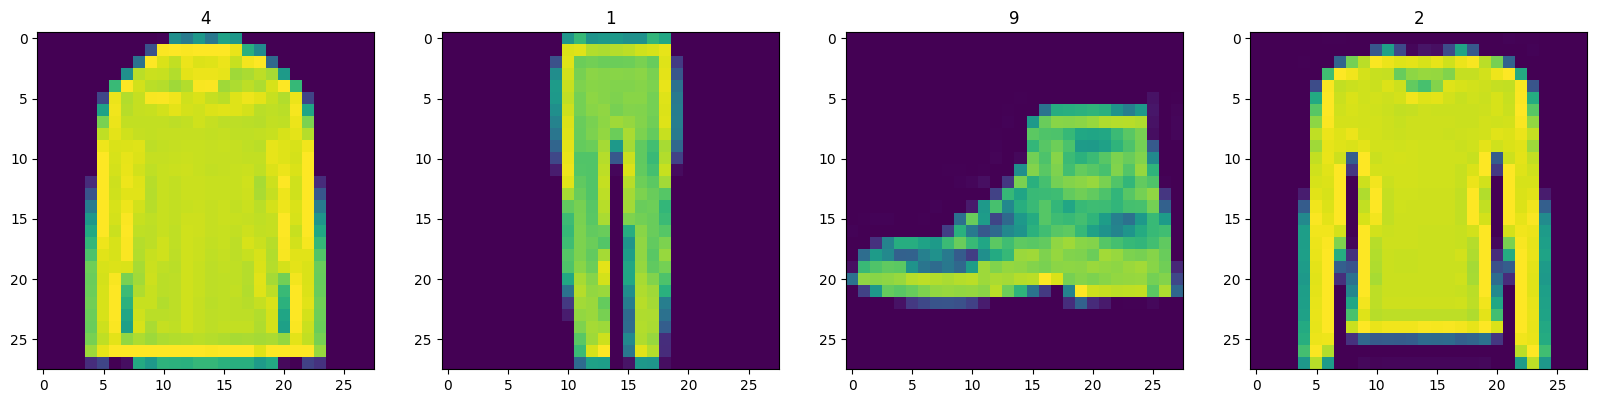

In [43]:
# set up subplot
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# loop four times and get images
for idx in range(4):
  sample = dataIterator.next()
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])

In [44]:
ax

array([<Axes: title={'center': '4'}>, <Axes: title={'center': '1'}>,
       <Axes: title={'center': '9'}>, <Axes: title={'center': '2'}>],
      dtype=object)

In [45]:
# scale and return image only
def scale_images(data):
  image = data['image']
  return image / 255

**Create data pipeline in tensorflow**

1. map

2. cache

3. shuffle

4. batch

5. prefetch

In [46]:
# Reload the dataset
ds = tfds.load('fashion_mnist', split='train')

# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)

# Cache the dataset for that batch
ds = ds.cache()

# Shuffle it up
ds = ds.shuffle(60000)

# Batch into 128 images per sample
ds = ds.batch(128)

# Reducing the training time
ds = ds.prefetch(64)

In [47]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## 3. Build neural network

### 3.1 Import Modelling Components

In [48]:
# bring in sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### 3.2 Build Generator

In [49]:
def build_generator():
  model = Sequential()

  # takes in random values and reshapes it into 7x7x128
  # beginnings of generator
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2)) # add activation function
  model.add(Reshape((7,7,128)))

  # upsampling block1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # upsampling block2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block1
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block2
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to get one channel
  model.add(Conv2D(1,4, padding='same', activation='sigmoid'))

  return model

In [50]:
generator = build_generator()
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [81]:
# generate new fashion
img = generator.predict(np.random.randn(4,128,1)) # generate 4 images

1/1 [==============================] - 0s 18ms/step


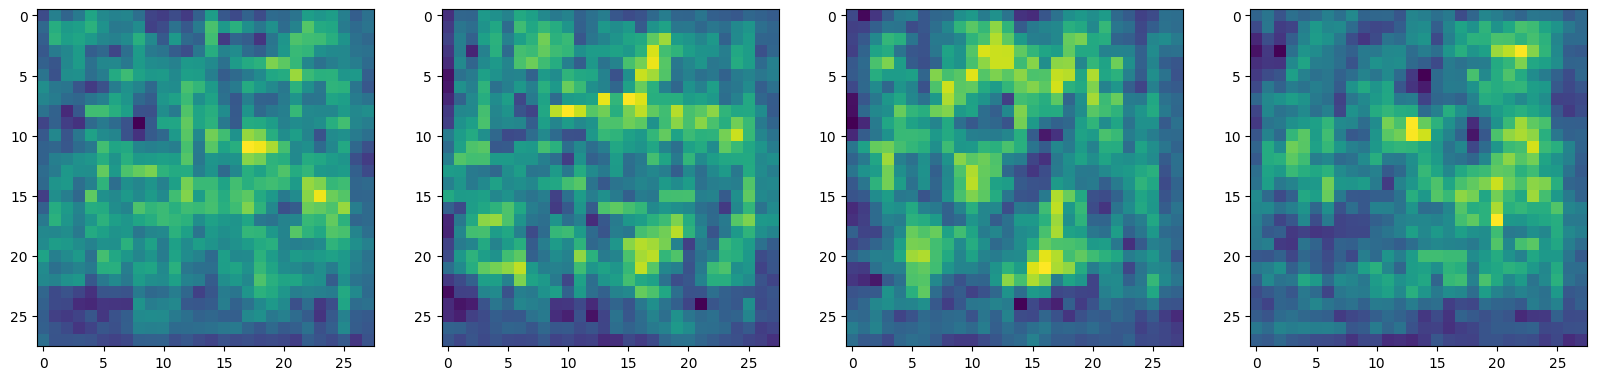

In [72]:


# set up subplot
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# loop four times and get images
for idx, img in enumerate(img):
  ax[idx].imshow(np. squeeze(img))


In [73]:
img.shape

(28, 28, 1)

### 3.3 Build Discriminator

In [54]:
def build_discriminator():
  model = Sequential()

  # First Conv Block
  model.add(Conv2D(32, 5, input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv Block
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Third Conv Block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Four Conv Block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  # 1 presents fake img, 0 presents real img
  model.add(Dense(1, activation='sigmoid')) # binary output

  return model

In [55]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_6 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)      

In [82]:
# passing a batch of img
discriminator.predict(img)

1/1 [==============================] - 0s 356ms/step


array([[0.49800828],
       [0.4982413 ],
       [0.4981206 ],
       [0.49826214]], dtype=float32)

In case that you just pass one img

In [74]:
oneImg = img

In [75]:
oneImg.shape

(28, 28, 1)

In [76]:
discriminator(oneImg)

InvalidArgumentError: Exception encountered when calling layer 'conv2d_14' (type Conv2D).

{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} Computed output size would be negative: -3 [input_size: 1, effective_filter_size: 5, stride: 1] [Op:Conv2D] name: 

Call arguments received by layer 'conv2d_14' (type Conv2D):
  • inputs=tf.Tensor(shape=(28, 28, 1, 1), dtype=float32)

It fails cuz it took the first dimension of the img instead of the first img in the batch

In [79]:
# add one more dimension to the img
np.expand_dims(oneImg, axis=(0)).shape

(1, 28, 28, 1)

In [80]:
discriminator.predict(np.expand_dims(oneImg, 0))

1/1 [==============================] - 0s 19ms/step


array([[0.49809268]], dtype=float32)

## 4. Custom training loops

### 4.1 Setup Losses and Optimers

In [84]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to the loss function for both
from tensorflow.keras.losses import BinaryCrossentropy

In [85]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

### 4.2 Build Subclassed Model

In [83]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [132]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs) -> None:
    # Pass through args and kwargs to base class
    super().__init__(*args, **kwargs)

    # Create attributes for gen and disc
    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    # Compile with base class
    super().compile(*args, **kwargs)

    # Create attributes for losses and optimizers
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss



  def train_step(self, batch):
    # Get the data
    real_images = batch
    fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

    # Train discriminator
    with tf.GradientTape() as d_tape:
      # Pass the real and fake img to discriminator model
      yhat_real = self.discriminator(real_images, training=True)
      yhat_fake = self.discriminator(fake_images, training=True)
      yhat_realfake = tf.concat([yhat_real,yhat_fake], axis=0) # combine into one ouput

      # Create labels for real and fake imgs
      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)],  axis=0)

      # Add some noise to the TRUE outputs
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis=0)

      # Calculate loss -BINARYCROSS
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)

    # Apply backpropagation -- nn learn
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as g_tape:
      # Generate some new images
      generatedImages = self.generator(tf.random.normal((128,128,1)), training=True)

      # Create the predicted labels
      predictedLabels = self.discriminator(generatedImages,
                                           training=False)
      # Calculate loss
      total_g_loss = self.g_loss(tf.zeros_like(predictedLabels), predictedLabels)

    # Apply backpropagation for generator
    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))


    return {'d_loss': total_d_loss, 'g_loss': total_g_loss}




In [133]:
# Create instance of subclasses model
fashgan = FashionGAN(generator, discriminator)

In [134]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### 4.3 Build Callback

In [135]:
import os # folder navigation
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [156]:
class ModelMonitor(Callback):
  def __init__(self, num_img=3, latent_dim=128):
    self.num_img = num_img # nb of img for one epoch
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs=None):
    random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
    generatedImages = self.model.generator(random_latent_vectors)
    generatedImages *= 255
    generatedImages.numpy()

    for i in range(self.num_img):
      img = array_to_img(generatedImages[i])
      img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))





### 4.4 Train

In [137]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [157]:
# Recommend 2000 epochs
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
  6/469 [..............................] - ETA: 1:15 - d_loss: 0.7280 - g_loss: 0.5128

469/469 [==============================] - 82s 175ms/step - d_loss: 0.6085 - g_loss: 0.5851
Epoch 2/20
469/469 [==============================] - 82s 174ms/step - d_loss: 0.7065 - g_loss: 0.4175
Epoch 3/20
469/469 [==============================] - 81s 174ms/step - d_loss: 0.6931 - g_loss: 0.6103
Epoch 4/20
469/469 [==============================] - 82s 174ms/step - d_loss: 0.6930 - g_loss: 0.5997
Epoch 5/20
469/469 [==============================] - 81s 173ms/step - d_loss: 0.6826 - g_loss: 0.6297
Epoch 6/20
469/469 [==============================] - 81s 173ms/step - d_loss: 0.6904 - g_loss: 0.6009
Epoch 7/20
469/469 [==============================] - 81s 173ms/step - d_loss: 0.6954 - g_loss: 0.6301
Epoch 8/20
469/469 [==============================] - 82s 174ms/step - d_loss: 0.6904 - g_loss: 0.6503
Epoch 9/20
469/469 [==============================] - 82s 174ms/step - d_loss: 0.6827 - g_loss: 0.6232
Epoch 10/20
469/469 [==============================] - 81s 173ms/step - d_loss: 0.69

In [158]:
hist.history

{'d_loss': [0.6781594157218933,
  0.7400659918785095,
  0.72507244348526,
  0.673477828502655,
  0.6861109733581543,
  0.7236442565917969,
  0.6926833987236023,
  0.6957006454467773,
  0.5658096671104431,
  0.7071954607963562,
  0.7019402384757996,
  0.6323681473731995,
  0.6877657771110535,
  0.6868265271186829,
  0.2860713005065918,
  0.27674663066864014,
  0.25477156043052673,
  0.2923557758331299,
  0.27561530470848083,
  0.27639734745025635],
 'g_loss': [0.3929622173309326,
  0.4992733597755432,
  0.6319833993911743,
  0.616066038608551,
  0.5575754642486572,
  0.5968011617660522,
  0.617566704750061,
  0.6194890737533569,
  0.8482485413551331,
  0.6176258325576782,
  0.6512987613677979,
  0.6637364625930786,
  0.6485954523086548,
  0.6792485117912292,
  2.634026050567627,
  2.6975345611572266,
  2.7191028594970703,
  0.30580654740333557,
  0.16369901597499847,
  0.17817121744155884]}

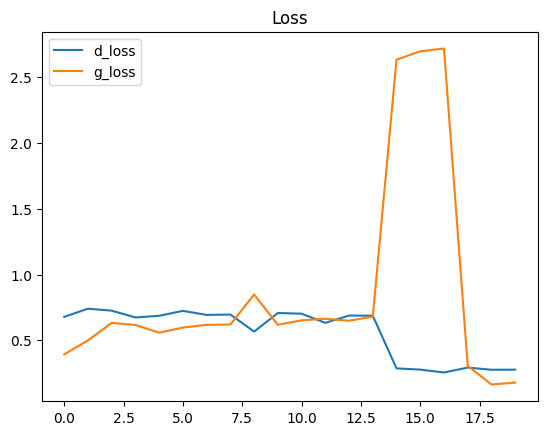

In [165]:
plt.plot(hist.history['d_loss'], label = 'd_loss')
plt.plot(hist.history['g_loss'], label = 'g_loss')
plt.legend()
plt.title('Loss')
plt.show()

## 5 Testing out


### Generate images

In [188]:
imgs = generator.predict(tf.random.normal((16,128,1)))


1/1 [==============================] - 0s 21ms/step


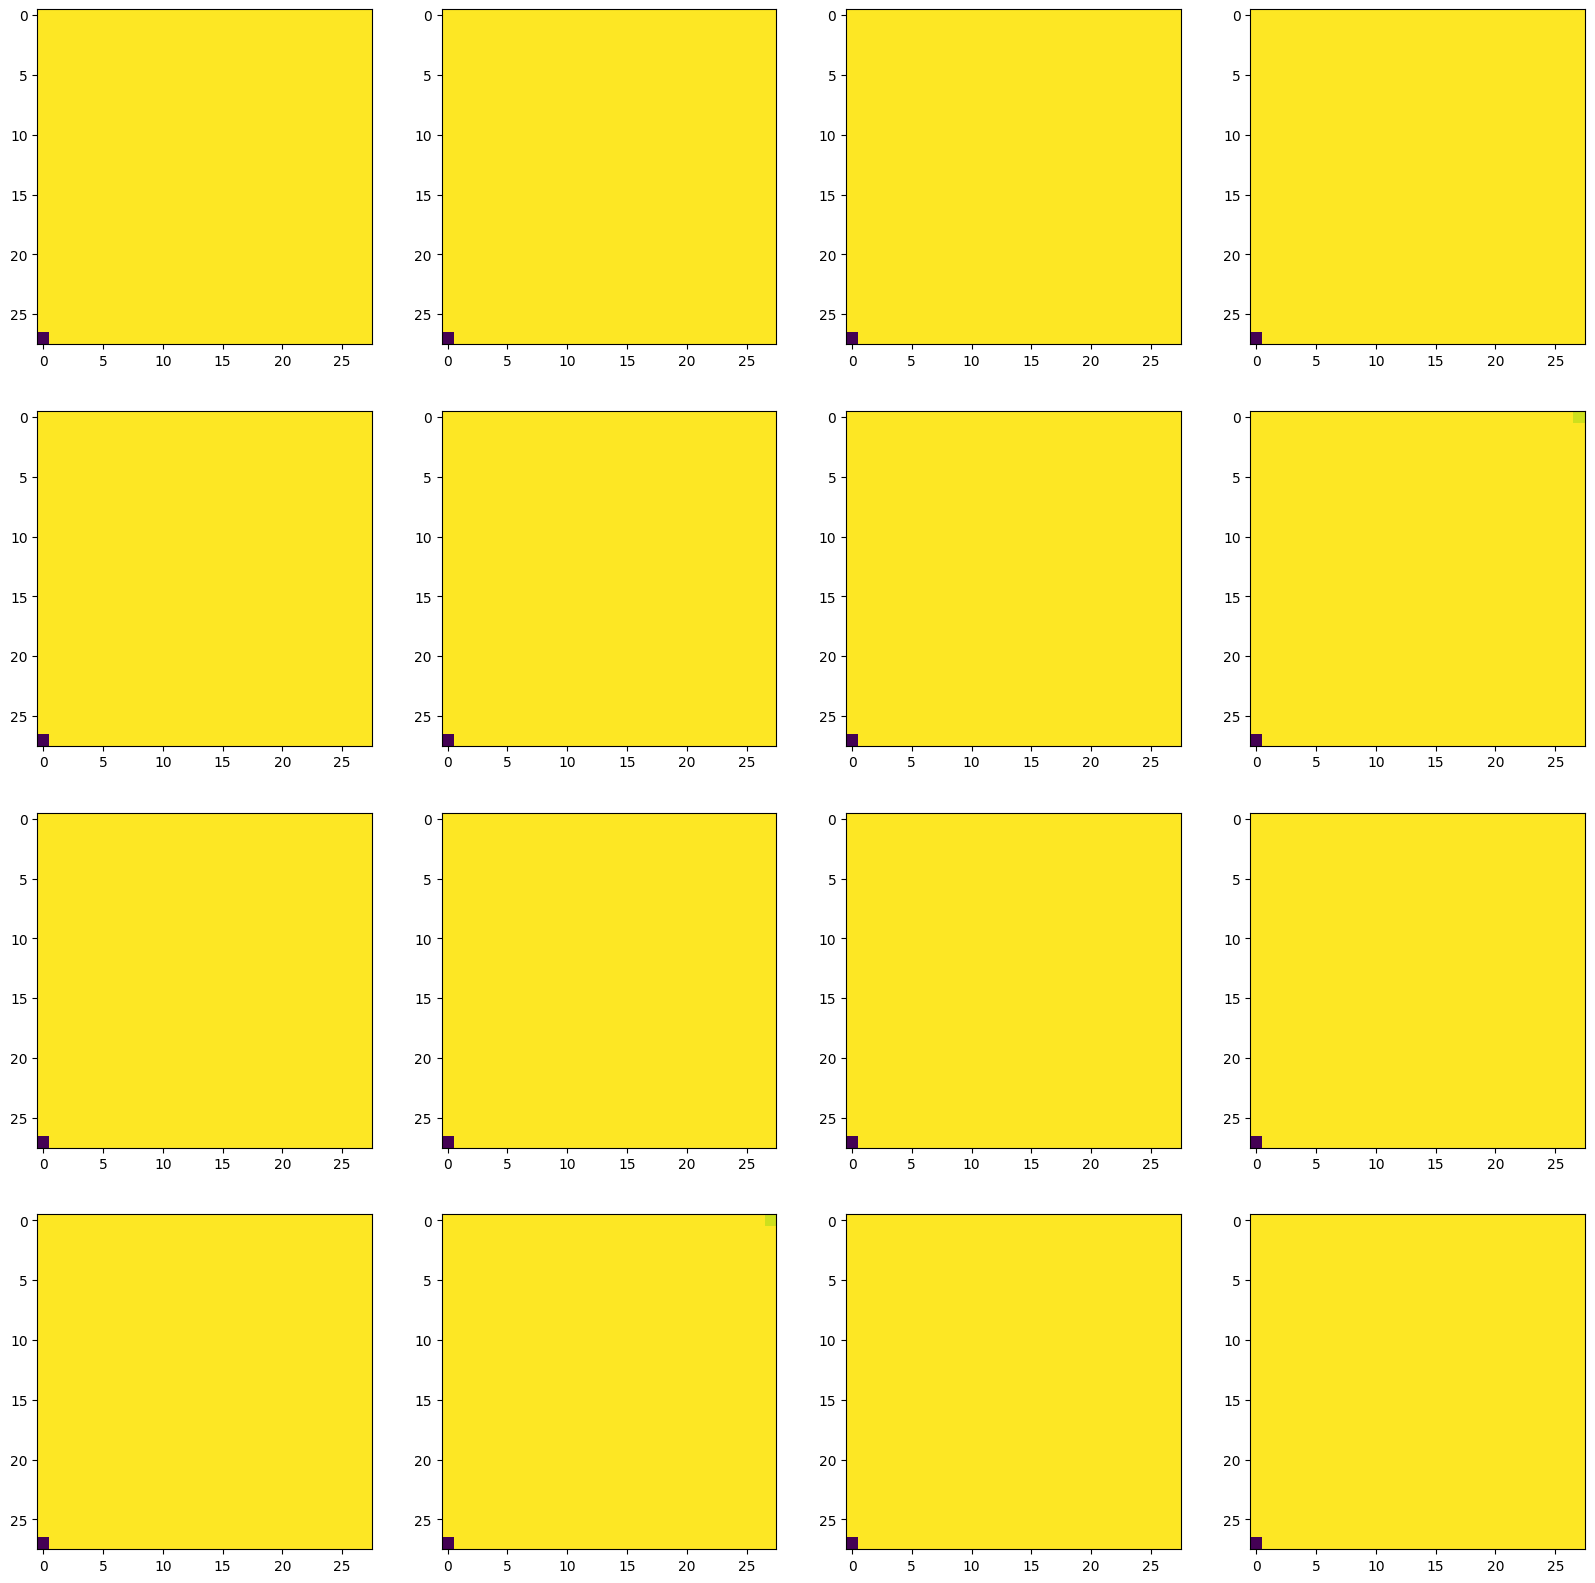

In [189]:
fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize=(20,20))

for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

